# Movie Data Analysis

Import needed libraries

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
%matplotlib inline

# Data Import

In [2]:
#reads tn budget file (csv)
tn_movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz") 
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
#unzips the SQL data, since SQLite doesn't work with zipped data.
! unzip -n zippedData/im.db.zip 


Archive:  zippedData/im.db.zip


In [4]:
conn = sqlite3.connect("im.db")


In [5]:
#reads imdb movie basics (sql)
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn) 
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


# Data Frame Cleaning

tn_movie_budget dataframe

In [6]:
#check data types.  Need int for numeric columns.
tn_movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [7]:
#change release date into datetime
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date']) 
#remove $ and ,
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace('$', '', regex=True) 
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].str.replace(',', '', regex=True)
#remove $ and ,
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace('$', '', regex=True) 
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].str.replace(',', '', regex=True)
#remove $ and ,
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace('$', '', regex=True) 
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].str.replace(',', '', regex=True)
#change data type obj to int
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].astype('int') 
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].astype('int')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].astype('int')

tn_movie_budgets.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object

In [8]:
#check for dupicates
tn_movie_budgets_dup = tn_movie_budgets[tn_movie_budgets.duplicated()] 
print(len(tn_movie_budgets_dup))

0


In [9]:
#cleaned df
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0
5778,79,1999-04-02,Following,6000,48482,240495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0


movie_basics dataframe

In [10]:
#check data types. All data types appropriate for analysis
movie_basics.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [11]:
#Check for missing data
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [12]:
#Drop missing data.  No way to generally guess at genres, runtime, or original title.
movie_basics = movie_basics.dropna()
movie_basics.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [13]:
#No missing infor, data types correct.
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
#need to turn entires into lists in order to explode.
movie_basics['genres'] 

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
4         Comedy,Drama,Fantasy
5                       Comedy
                  ...         
146134             Documentary
146135                   Drama
146136             Documentary
146137          Drama,Thriller
146139                   Drama
Name: genres, Length: 112232, dtype: object

In [15]:
#turn off chained 
pd.options.mode.chained_assignment = None 
#genre entries are lists that need to be exploded
movie_basics['genres'] = movie_basics['genres'].str.split(',') 
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama]
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,[Comedy]
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,[Documentary]
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,[Drama]
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,[Documentary]
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"[Drama, Thriller]"


In [16]:
#each entry has one genre now
movie_basics = movie_basics.explode('genres',ignore_index = 'false') 

In [17]:
#check for duplicates
movie_basics_dup = movie_basics[movie_basics.duplicated()] 
print(len(movie_basics_dup))

0


In [18]:
#Cleaned data frame
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
3,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
...,...,...,...,...,...,...
193726,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
193727,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
193728,tt9916190,Safeguard,Safeguard,2019,90.0,Drama
193729,tt9916190,Safeguard,Safeguard,2019,90.0,Thriller


Combine Tables

In [19]:
#merge tables
master_list=pd.merge(movie_basics,tn_movie_budgets, left_on='primary_title', right_on='movie') 
master_list

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,26,2012-12-31,Foodfight!,45000000,0,73706
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,Animation,26,2012-12-31,Foodfight!,45000000,0,73706
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,Comedy,26,2012-12-31,Foodfight!,45000000,0,73706
3,tt0337692,On the Road,On the Road,2012,124.0,Adventure,17,2013-03-22,On the Road,25000000,720828,9313302
4,tt0337692,On the Road,On the Road,2012,124.0,Drama,17,2013-03-22,On the Road,25000000,720828,9313302
...,...,...,...,...,...,...,...,...,...,...,...,...
7199,tt9607270,The Blue Bird,The Blue Bird,2015,84.0,Drama,71,1976-01-01,The Blue Bird,1200000,887000,887000
7200,tt9805168,Traitor,Traitor,2015,110.0,Action,25,2008-08-27,Traitor,22000000,23530831,27882226
7201,tt9805168,Traitor,Traitor,2015,110.0,Drama,25,2008-08-27,Traitor,22000000,23530831,27882226
7202,tt9805168,Traitor,Traitor,2015,110.0,Romance,25,2008-08-27,Traitor,22000000,23530831,27882226


In [20]:
#add world wide profit column
master_list['worldwide_profit'] = master_list['worldwide_gross'] - master_list['production_budget'] 
#add domestic profit column
master_list['domestic_profit'] = master_list['domestic_gross'] - master_list['production_budget'] 


In [21]:
#add release month column
master_list['release_month'] = master_list['release_date'].dt.month 

In [22]:
#labels the release month with a season
def season_release (row):           
   if row['release_month'] <= 2 :
      return 'winter'
   if row['release_month'] == 3 : 
      return 'spring'
   if row['release_month'] == 4 :
      return 'spring'
   if row['release_month'] == 5:
      return 'spring'
   if row['release_month']  == 6:
      return 'summer'
   if row['release_month'] == 7:
      return 'summer'
   if row['release_month'] == 8:
      return 'summer'
   if row['release_month'] == 9 :
      return 'fall'
   if row['release_month'] == 10 : 
      return 'fall'
   if row['release_month'] == 11 :
      return 'fall'
   if row['release_month'] == 12:
      return 'winter'
   return 'Other'

In [23]:
#Add season column
master_list['season_release'] = master_list.apply (lambda row: season_release(row), axis=1)
master_list

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,domestic_profit,release_month,season_release
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,26,2012-12-31,Foodfight!,45000000,0,73706,-44926294,-45000000,12,winter
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,Animation,26,2012-12-31,Foodfight!,45000000,0,73706,-44926294,-45000000,12,winter
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,Comedy,26,2012-12-31,Foodfight!,45000000,0,73706,-44926294,-45000000,12,winter
3,tt0337692,On the Road,On the Road,2012,124.0,Adventure,17,2013-03-22,On the Road,25000000,720828,9313302,-15686698,-24279172,3,spring
4,tt0337692,On the Road,On the Road,2012,124.0,Drama,17,2013-03-22,On the Road,25000000,720828,9313302,-15686698,-24279172,3,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7199,tt9607270,The Blue Bird,The Blue Bird,2015,84.0,Drama,71,1976-01-01,The Blue Bird,1200000,887000,887000,-313000,-313000,1,winter
7200,tt9805168,Traitor,Traitor,2015,110.0,Action,25,2008-08-27,Traitor,22000000,23530831,27882226,5882226,1530831,8,summer
7201,tt9805168,Traitor,Traitor,2015,110.0,Drama,25,2008-08-27,Traitor,22000000,23530831,27882226,5882226,1530831,8,summer
7202,tt9805168,Traitor,Traitor,2015,110.0,Romance,25,2008-08-27,Traitor,22000000,23530831,27882226,5882226,1530831,8,summer


In [24]:
#Determine how many data points are associated with each genre
master_list['genres'].value_counts()

Drama          1641
Comedy          793
Action          647
Thriller        544
Adventure       469
Documentary     452
Horror          381
Crime           379
Romance         350
Biography       247
Mystery         233
Sci-Fi          212
Family          189
Fantasy         184
Animation       137
History          90
Music            84
Sport            70
War              48
Musical          28
Western          18
News              7
Reality-TV        1
Name: genres, dtype: int64

In [25]:
#creat a df of the value counts
genre_vc = pd.DataFrame(master_list['genres'].value_counts()) 
#add index so genre becomes a useable column
genre_vc.reset_index(inplace=True) 
#label columns 
genre_vc.columns = ['genres','counts'] 
#merge master list and valuecounts
master_list = master_list.merge(genre_vc,on='genres') 
#filter df to use genres with at least 200  data entries
master_list = master_list[master_list.counts>=200] 


In [26]:
#Check new list for genres with more than 200 data entries for analysis
master_list['genres'].value_counts()

Drama          1641
Comedy          793
Action          647
Thriller        544
Adventure       469
Documentary     452
Horror          381
Crime           379
Romance         350
Biography       247
Mystery         233
Sci-Fi          212
Name: genres, dtype: int64

In [27]:
#Creat column worldwide profit per minute of run time
master_list['profit per min (w)'] = master_list['worldwide_profit']/master_list['runtime_minutes']
#Creat column domestic profit per minute of run time
master_list['profit per min (d)'] = master_list['domestic_profit']/master_list['runtime_minutes']

In [28]:
#Check final merged dataframe
master_list

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profit,domestic_profit,release_month,season_release,counts,profit per min (w),profit per min (d)
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,26,2012-12-31,Foodfight!,45000000,0,73706,-44926294,-45000000,12,winter,647,-4.936955e+05,-4.945055e+05
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,Action,67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,34108587,-1982315,9,fall,647,2.991981e+05,-1.738873e+04
2,tt0369610,Jurassic World,Jurassic World,2015,124.0,Action,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,1433854864,437270625,6,summer,647,1.156335e+07,3.526376e+06
3,tt0401729,John Carter,John Carter,2012,132.0,Action,14,2012-03-09,John Carter,275000000,73058679,282778100,7778100,-201941321,3,spring,647,5.892500e+04,-1.529858e+06
4,tt0403935,Action Jackson,Action Jackson,2014,144.0,Action,8,1988-02-12,Action Jackson,7000000,20257000,20257000,13257000,13257000,2,winter,647,9.206250e+04,9.206250e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,tt7349662,BlacKkKlansman,BlacKkKlansman,2018,135.0,Biography,21,2018-08-10,BlacKkKlansman,15000000,49275340,93017335,78017335,34275340,8,summer,247,5.779062e+05,2.538914e+05
6670,tt7388562,"Paul, Apostle of Christ","Paul, Apostle of Christ",2018,108.0,Biography,95,2018-03-23,"Paul, Apostle of Christ",5000000,17547999,25529498,20529498,12547999,3,spring,247,1.900879e+05,1.161852e+05
6671,tt7809816,Henry V,Henry V,2018,122.0,Biography,91,1989-11-08,Henry V,9000000,10161099,10176701,1176701,1161099,11,fall,247,9.645090e+03,9.517205e+03
6672,tt8266310,Blinded by the Light,Blinded by the Light,2019,117.0,Biography,64,2019-08-14,Blinded by the Light,15000000,0,0,-15000000,-15000000,8,summer,247,-1.282051e+05,-1.282051e+05


# Graphs

In [29]:
#color palette for seasons
hue_colors = {'spring': '#ffbb00', 
              'summer': '#f65314', 
              'fall': '#7cbb00',
              'winter': '#00a1f1'}
#color paletter for genres
hue_colors_genres = {'Adventure' : '#73b761',
                     'Sci-Fi' : '#4A588A',
                     'Action' : '#ECC846',
                     'Comedy' : '#CD4C46',
                     'Thriller' : '#71AEF2',
                     'Adventure' : '#8D6FD1',
                     'Mystery' : '#EE9E64',
                     'Horror' : '#95DABB',
                     'Crime' : '#A43B76',
                     'Documentary' : '#EC5A96',
                     'Biography' : '#438FFF'}
;

''

In [30]:
#Worldwide average profit by season
season_gross_ww = master_list.groupby(['season_release']).mean(['worldwide_profit']).sort_values(by='worldwide_profit',ascending=0)
season_gross_ww.reset_index(inplace=True)

season_gross_ww

,season_release,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,worldwide_profit,domestic_profit,release_month,counts,profit per min (w),profit per min (d)
0,summer,2013.923435,98.967377,53.179760,4.080127e+07,5.215842e+07,1.265966e+08,8.579529e+07,1.135715e+07,7.007324,778.012650,9.438555e+05,139171.644253
1,spring,2014.082421,99.068899,49.675467,4.157913e+07,4.866738e+07,1.215134e+08,7.993425e+07,7.088250e+06,3.925950,782.378622,1.158681e+06,131403.798431
2,fall,2013.909574,101.445626,48.330378,3.076141e+07,3.508837e+07,8.632152e+07,5.556011e+07,4.326960e+06,9.963357,799.384161,5.855828e+05,48402.344665
3,winter,2014.166146,101.298563,53.412867,2.948981e+07,3.818214e+07,8.462240e+07,5.513259e+07,8.692330e+06,6.420362,809.442224,6.048966e+05,87838.135416


''

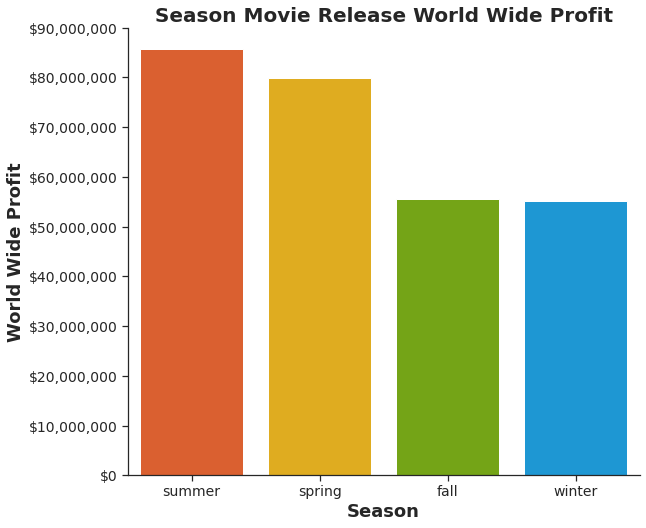

In [31]:
#set axis and color scheme
sns.set(style="ticks")  

#define chart
season_ww = sns.catplot(x="season_release", y="worldwide_profit",
                data=season_gross_ww, kind="bar", palette = hue_colors,
                height=7, aspect=1.1, legend=False)

#modify individual font size of elements
plt.xlabel('Season', fontsize=18, weight='bold');
plt.ylabel('World Wide Profit', fontsize=18, weight='bold');
plt.title('Season Movie Release World Wide Profit', fontsize=20,weight='bold')
plt.ylim(0,90000000)
plt.tick_params(axis='both', which='major', labelsize=14)
#change axis format to dollars
for ax in season_ww.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: '$' + f'{y:,.0f}'))
;

''

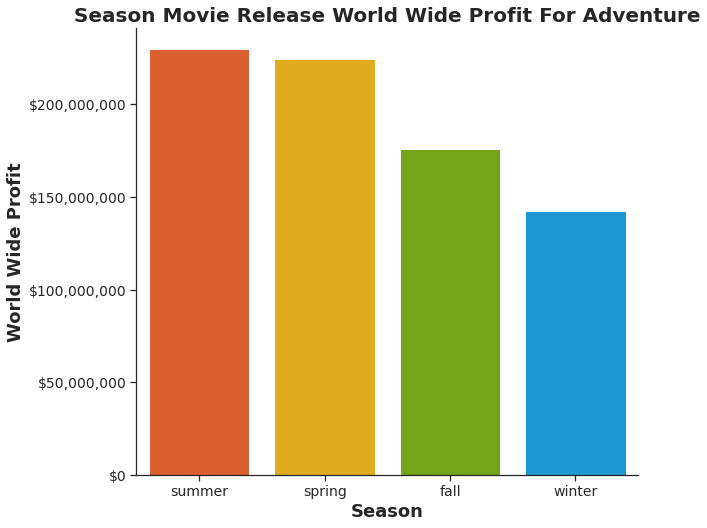

In [32]:
#world wide profit by season for adventure

#Adventure profits only 
adventure = master_list[master_list['genres'] == 'Adventure'] 
#Worldwide average profit by season
adv_season_gross_ww = adventure.groupby(['season_release']).mean(['worldwide_profit']).sort_values(by='worldwide_profit',ascending=0)
adv_season_gross_ww.reset_index(inplace=True)

#set axis and color scheme
sns.set(style="ticks")  

#define chart
adventure_ww = sns.catplot(x="season_release", y="worldwide_profit",
                data=adv_season_gross_ww, kind="bar", palette = hue_colors,
                height=7, aspect=1.1, legend=False)

#modify individual font size of elements
plt.xlabel('Season', fontsize=18, weight='bold');
plt.ylabel('World Wide Profit', fontsize=18, weight='bold');
plt.title('Season Movie Release World Wide Profit For Adventure', fontsize=20,weight='bold')
#plt.ylim(0,90000000)
plt.tick_params(axis='both', which='major', labelsize=14)
#change axis format to dollars
for ax in adventure_ww.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: '$' + f'{y:,.0f}'))
;

In [33]:
adv_season_gross_ww

,season_release,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,worldwide_profit,domestic_profit,release_month,counts,profit per min (w),profit per min (d)
0,summer,2014.059701,105.440299,52.671642,9.608022e+07,1.162719e+08,3.256985e+08,2.296183e+08,2.019171e+07,6.850746,469.0,2.136784e+06,226526.282291
1,spring,2014.495935,108.943089,47.203252,1.087715e+08,1.191788e+08,3.328885e+08,2.241170e+08,1.040737e+07,3.975610,469.0,1.875475e+06,59405.170478
2,fall,2014.262626,105.050505,46.101010,8.049488e+07,8.843296e+07,2.563770e+08,1.758821e+08,7.938078e+06,10.252525,469.0,1.520401e+06,17240.489951
3,winter,2014.451327,105.814159,49.504425,6.543035e+07,7.886530e+07,2.076910e+08,1.422607e+08,1.343494e+07,6.840708,469.0,1.422158e+06,175040.193231


In [34]:
#domestic average profit by season
season_gross_dom = season_gross_ww.groupby(['season_release']).mean(['domestic_profit']).sort_values(by='domestic_profit',ascending=0)
season_gross_dom.reset_index(inplace=True)

season_gross_dom

,season_release,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,worldwide_profit,domestic_profit,release_month,counts,profit per min (w),profit per min (d)
0,summer,2013.923435,98.967377,53.179760,4.080127e+07,5.215842e+07,1.265966e+08,8.579529e+07,1.135715e+07,7.007324,778.012650,9.438555e+05,139171.644253
1,winter,2014.166146,101.298563,53.412867,2.948981e+07,3.818214e+07,8.462240e+07,5.513259e+07,8.692330e+06,6.420362,809.442224,6.048966e+05,87838.135416
2,spring,2014.082421,99.068899,49.675467,4.157913e+07,4.866738e+07,1.215134e+08,7.993425e+07,7.088250e+06,3.925950,782.378622,1.158681e+06,131403.798431
3,fall,2013.909574,101.445626,48.330378,3.076141e+07,3.508837e+07,8.632152e+07,5.556011e+07,4.326960e+06,9.963357,799.384161,5.855828e+05,48402.344665


''

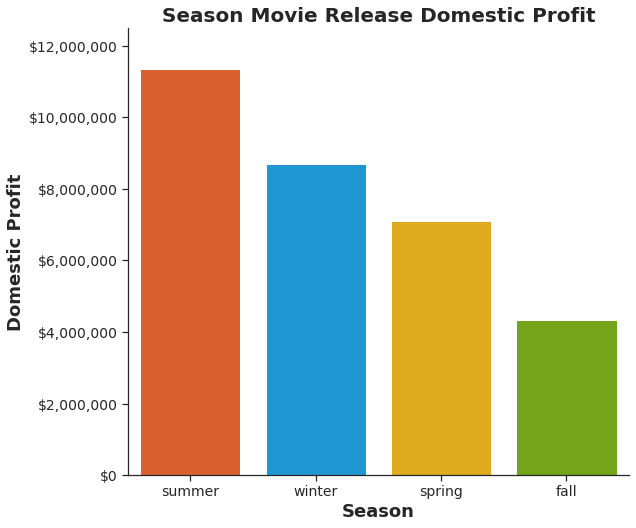

In [35]:
#set axis and color scheme
sns.set(style="ticks") 

#define chart
season_gross_dom = sns.catplot(x="season_release", y="domestic_profit", 
                data=season_gross_dom, kind="bar", palette = hue_colors,
                height=7, aspect=1.1, legend=False)

#modify individual font size of elements
plt.xlabel('Season', fontsize=18, weight='bold');
plt.ylabel('Domestic Profit', fontsize=18, weight='bold');
plt.title('Season Movie Release Domestic Profit', fontsize=20,weight='bold')
plt.ylim(0, 12500000)
plt.tick_params(axis='both', which='major', labelsize=14)
#change axis format to dollars
for ax in season_gross_dom.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: '$' + f'{y:,.0f}'))
;

''

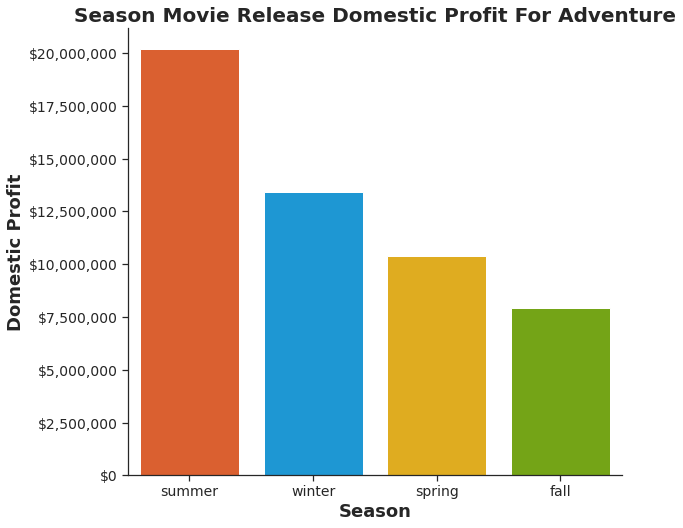

In [36]:
#domestic profit by season for adventure

#Adventure profits only 
adventure = master_list[master_list['genres'] == 'Adventure'] 
#domestic average profit by season
adv_season_gross_dom = adventure.groupby(['season_release']).mean(['domestic_profit']).sort_values(by='domestic_profit',ascending=0)
adv_season_gross_dom.reset_index(inplace=True)

#set axis and color scheme
sns.set(style="ticks")  

#define chart
adventure_dom = sns.catplot(x="season_release", y="domestic_profit",
                data=adv_season_gross_dom, kind="bar", palette = hue_colors,
                height=7, aspect=1.1, legend=False)

#modify individual font size of elements
plt.xlabel('Season', fontsize=18, weight='bold');
plt.ylabel('Domestic Profit', fontsize=18, weight='bold');
plt.title('Season Movie Release Domestic Profit For Adventure', fontsize=20,weight='bold')
#plt.ylim(0,90000000)
plt.tick_params(axis='both', which='major', labelsize=14)
#change axis format to dollars
for ax in adventure_dom.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: '$' + f'{y:,.0f}'))
;

In [37]:
adv_season_gross_dom

,season_release,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,worldwide_profit,domestic_profit,release_month,counts,profit per min (w),profit per min (d)
0,summer,2014.059701,105.440299,52.671642,9.608022e+07,1.162719e+08,3.256985e+08,2.296183e+08,2.019171e+07,6.850746,469.0,2.136784e+06,226526.282291
1,winter,2014.451327,105.814159,49.504425,6.543035e+07,7.886530e+07,2.076910e+08,1.422607e+08,1.343494e+07,6.840708,469.0,1.422158e+06,175040.193231
2,spring,2014.495935,108.943089,47.203252,1.087715e+08,1.191788e+08,3.328885e+08,2.241170e+08,1.040737e+07,3.975610,469.0,1.875475e+06,59405.170478
3,fall,2014.262626,105.050505,46.101010,8.049488e+07,8.843296e+07,2.563770e+08,1.758821e+08,7.938078e+06,10.252525,469.0,1.520401e+06,17240.489951


In [38]:
#Remove outliers 
run_time = master_list[(master_list['runtime_minutes'] > 50) & (master_list['runtime_minutes'] < 200)] 

''

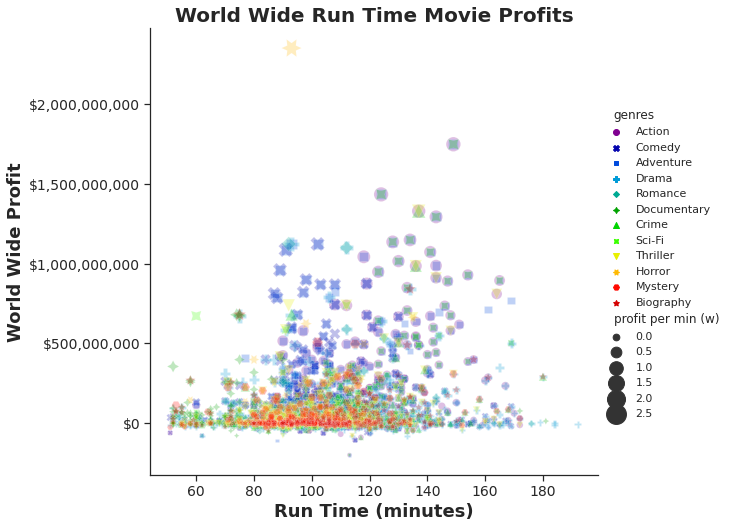

In [39]:
#Worldwide average profit by runtime

#set axis and color scheme
sns.set(style="ticks")

# Plot worldwide profit against run time with runtime per minute sizing the data size
ww_rt = sns.relplot(x="runtime_minutes", y="worldwide_profit", hue="genres", size="profit per min (w)",
            sizes=(20, 400), alpha=.25, palette="nipy_spectral", style="genres", 
            height=7, data=run_time);

#modify individual font size of elements
plt.xlabel('Run Time (minutes)', fontsize=18, weight='bold');
plt.ylabel('World Wide Profit', fontsize=18, weight='bold');
plt.title('World Wide Run Time Movie Profits', fontsize=20,weight='bold')
plt.ylim()
plt.tick_params(axis='both', which='major', labelsize=14)

#change axis format to dollars
for ax in ww_rt.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: '$' + f'{y:,.0f}'))
    #ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x}: Is that your best'))
;

''

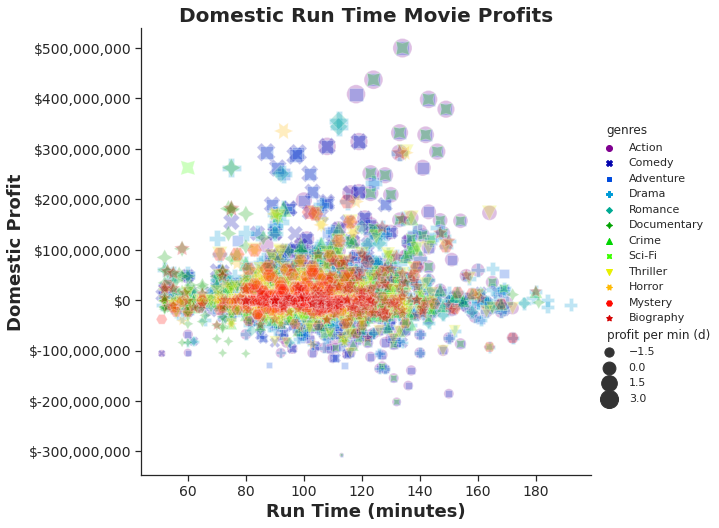

In [40]:
#domestic average profit by runtime

#set axis and color scheme
sns.set(style="ticks")

# Plot worldwide profit against run time with runtime per minute sizing the data size
ww_rt = sns.relplot(x="runtime_minutes", y="domestic_profit", hue="genres", size="profit per min (d)",
            sizes=(20, 400), alpha=.25, palette="nipy_spectral", style="genres", 
            height=7, data=run_time);

#modify individual font size of elements
plt.xlabel('Run Time (minutes)', fontsize=18, weight='bold');
plt.ylabel('Domestic Profit', fontsize=18, weight='bold');
plt.title('Domestic Run Time Movie Profits', fontsize=20,weight='bold')
plt.ylim()
plt.tick_params(axis='both', which='major', labelsize=14)

#change axis format to dollars
for ax in ww_rt.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: '$' + f'{y:,.0f}'))
    #ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x}: Is that your best'))
;

In [41]:
#Worldwide average profit by genres

top_10_gross_ww = master_list.groupby(['genres']).mean(['worldwide_profit']).sort_values(by='worldwide_profit',ascending=0).head(5)
top_10_gross_ww.reset_index(inplace=True)

top_10_gross_ww

,genres,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,worldwide_profit,domestic_profit,release_month,counts,profit per min (w),profit per min (d)
0,Adventure,2014.311301,106.366738,49.087420,8.873404e+07,1.021452e+08,2.845187e+08,1.957847e+08,1.341112e+07,6.812367,469.0,1.765962e+06,126114.516282
1,Sci-Fi,2014.419811,107.169811,52.849057,6.772153e+07,8.877626e+07,2.383115e+08,1.705900e+08,2.105473e+07,6.707547,212.0,1.415339e+06,181773.691984
2,Action,2014.114374,109.323029,49.967543,6.484782e+07,6.954402e+07,1.865388e+08,1.216909e+08,4.696204e+06,6.692427,647.0,1.012103e+06,21039.006876
3,Comedy,2013.754098,100.307692,51.358134,3.338566e+07,4.686716e+07,1.042646e+08,7.087896e+07,1.348150e+07,6.849937,793.0,7.279614e+05,142661.151246
4,Thriller,2013.981618,100.601103,52.630515,2.728592e+07,3.228398e+07,7.915914e+07,5.187322e+07,4.998063e+06,6.878676,544.0,6.542001e+05,84308.194803


''

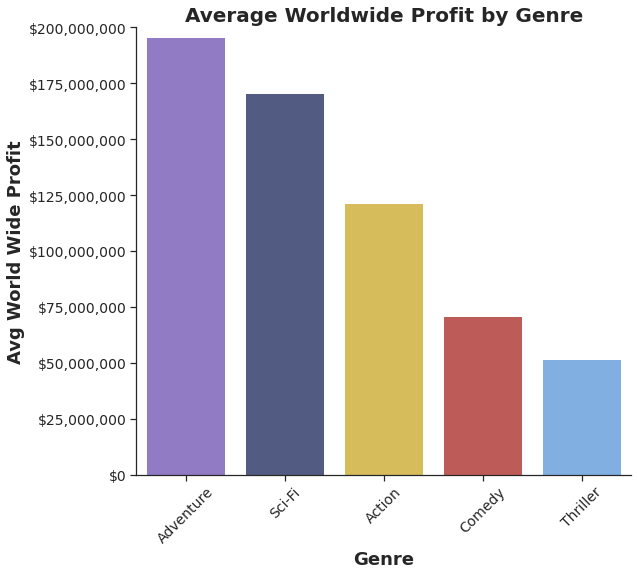

In [42]:
#set axis and color scheme
sns.set(style="ticks")


# Plot worldwide profit against run time with runtime per minute sizing the data size
genre_ww = sns.catplot(x="genres", y="worldwide_profit",                
                data=top_10_gross_ww, kind="bar",palette =hue_colors_genres,
                height=7, aspect=1.1)

#modify individual font size of elements
plt.xlabel('Genre', fontsize=18, weight='bold')
plt.xticks(rotation=45)
;
plt.ylabel('Avg World Wide Profit', fontsize=18, weight='bold');
plt.title('Average Worldwide Profit by Genre', fontsize=20,weight='bold')
plt.ylim(0, 200000000)
plt.tick_params(axis='both', which='major', labelsize=14)

#change axis format to dollars
for ax in genre_ww.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: '$' + f'{y:,.0f}'))
    #ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x}: Is that your best'))
;


In [43]:
#domestic average profit by genres

top_10_gross_dom = master_list.groupby(['genres']).mean(['domestic_profit']).sort_values(by='domestic_profit',ascending=0).head(5)
top_10_gross_dom.reset_index(inplace=True)

top_10_gross_dom

,genres,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,worldwide_profit,domestic_profit,release_month,counts,profit per min (w),profit per min (d)
0,Sci-Fi,2014.419811,107.169811,52.849057,6.772153e+07,8.877626e+07,2.383115e+08,1.705900e+08,2.105473e+07,6.707547,212.0,1.415339e+06,181773.691984
1,Comedy,2013.754098,100.307692,51.358134,3.338566e+07,4.686716e+07,1.042646e+08,7.087896e+07,1.348150e+07,6.849937,793.0,7.279614e+05,142661.151246
2,Adventure,2014.311301,106.366738,49.087420,8.873404e+07,1.021452e+08,2.845187e+08,1.957847e+08,1.341112e+07,6.812367,469.0,1.765962e+06,126114.516282
3,Horror,2014.010499,93.989501,53.590551,1.818058e+07,2.760341e+07,6.263707e+07,4.445649e+07,9.422829e+06,6.855643,381.0,4.611572e+05,77122.093859
4,Mystery,2013.969957,100.806867,53.635193,2.183933e+07,3.119254e+07,6.900329e+07,4.716395e+07,9.353207e+06,6.742489,233.0,4.548617e+05,93614.474392


''

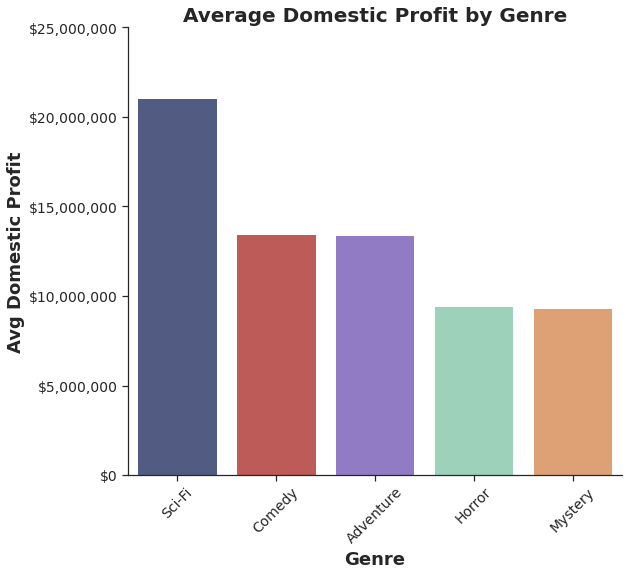

In [44]:
#set axis and color scheme
sns.set(style="ticks")


# Plot worldwide profit against run time with runtime per minute sizing the data size
genre_dom = sns.catplot(x="genres", y="domestic_profit",              
                data=top_10_gross_dom, kind="bar",palette =hue_colors_genres,
                height=7, aspect=1.1)

#modify individual font size of elements
plt.xlabel('Genre', fontsize=18, weight='bold')
plt.xticks(rotation=45)
;
plt.ylabel('Avg Domestic Profit', fontsize=18, weight='bold');
plt.title('Average Domestic Profit by Genre', fontsize=20,weight='bold')
plt.ylim(0, 25000000)
plt.tick_params(axis='both', which='major', labelsize=14)

#change axis format to dollars
for ax in genre_dom.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: '$' + f'{y:,.0f}'))
    #ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x}: Is that your best'))
;


In [45]:
#Production cost by genres

top_10_production_cost = master_list.groupby(['genres']).mean(['production_budget']).sort_values(by='production_budget',ascending=0).head(8)
top_10_production_cost.reset_index(inplace=True)

top_10_production_cost

,genres,start_year,runtime_minutes,id,production_budget,domestic_gross,worldwide_gross,worldwide_profit,domestic_profit,release_month,counts,profit per min (w),profit per min (d)
0,Adventure,2014.311301,106.366738,49.087420,8.873404e+07,1.021452e+08,2.845187e+08,1.957847e+08,1.341112e+07,6.812367,469.0,1.765962e+06,126114.516282
1,Sci-Fi,2014.419811,107.169811,52.849057,6.772153e+07,8.877626e+07,2.383115e+08,1.705900e+08,2.105473e+07,6.707547,212.0,1.415339e+06,181773.691984
2,Action,2014.114374,109.323029,49.967543,6.484782e+07,6.954402e+07,1.865388e+08,1.216909e+08,4.696204e+06,6.692427,647.0,1.012103e+06,21039.006876
3,Comedy,2013.754098,100.307692,51.358134,3.338566e+07,4.686716e+07,1.042646e+08,7.087896e+07,1.348150e+07,6.849937,793.0,7.279614e+05,142661.151246
4,Crime,2013.833773,105.559367,49.556728,2.750526e+07,2.972812e+07,6.456190e+07,3.705664e+07,2.222857e+06,6.894459,379.0,3.198362e+05,17275.182192
5,Thriller,2013.981618,100.601103,52.630515,2.728592e+07,3.228398e+07,7.915914e+07,5.187322e+07,4.998063e+06,6.878676,544.0,6.542001e+05,84308.194803
6,Documentary,2014.407080,62.674779,49.006637,2.557634e+07,3.116665e+07,6.582680e+07,4.025046e+07,5.590308e+06,6.599558,452.0,1.924095e+06,255640.215746
7,Biography,2014.356275,99.271255,51.603239,2.523351e+07,3.362704e+07,6.868744e+07,4.345393e+07,8.393537e+06,7.716599,247.0,1.236673e+06,229038.715366


''

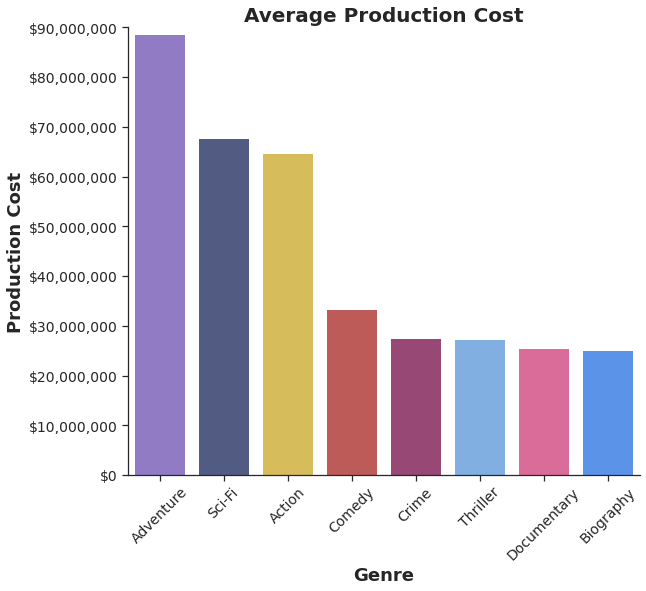

In [46]:
#set axis and color scheme
sns.set(style="ticks")


# Plot worldwide profit against run time with runtime per minute sizing the data size
genre_prod = sns.catplot(x="genres", y="production_budget",                
                data=top_10_production_cost, kind="bar", palette=hue_colors_genres,
                height=7, aspect=1.1)

#modify individual font size of elements
plt.xlabel('Genre', fontsize=18, weight='bold')
plt.xticks(rotation=45)
;
plt.ylabel('Production Cost', fontsize=18, weight='bold');
plt.title('Average Production Cost', fontsize=20,weight='bold')
plt.ylim(0, 90000000)
plt.tick_params(axis='both', which='major', labelsize=14)

#change axis format to dollars
for ax in genre_prod.axes.flat:
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: '$' + f'{y:,.0f}'))
    #ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f'{x}: Is that your best'))
;

In [47]:
#close connection
conn.close()